<small><i>This notebook is almost entirely based on the notebook put together by [Abraham Flaxman](http://www.math.cmu.edu/~adf/) for UW's [Astro 599](http://www.astro.washington.edu/users/vanderplas/Astr599_2014/) course. Source and license info is on [GitHub](https://github.com/jakevdp/2014_fall_ASTR599/).</i></small>

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.



In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
pd.options.display.max_rows = 100

!pip install xlrd

    100% |████████████████████████████████| 112kB 2.5MB/s 


# learning objectives:

* know that `pandas` exists --- tool for manipulating medium sized tabular data
* know how to learn more about `pandas`
* get some hands on experience with the `pandas.DataFrame` for data manipulation


# hands on experience

* making `DataFrames`
* using tabular data
* reshaping tables
* combining tables
* grouping, mapping, and applying
* dealing with date and time data


# making `DataFrames` from scratch

In [0]:
df = pd.DataFrame({'a': [10,20,30],
                   'b': [40,50,60]})

In [5]:
df['a']

0    10
1    20
2    30
Name: a, dtype: int64

In [6]:
df.b[1]

50

In [7]:
# think of DataFrames as numpy arrays plus
df.columns
df.index
df.b.index is df.index

True

# our running example

![](https://github.com/jakevdp/2014_fall_ASTR599/raw/99fca61a591d22cec22562ff6670c247a5a67608/notebooks/images/RAE0KN24ST7JHKGGF420DR34GMC1E0P0.png)

From [Global Health Data Exchange](http://ghdx.healthdata.org/record/population-health-metrics-research-consortium-gold-standard-verbal-autopsy-data-2005-2011), load PHMRC VA adult data, CSV format:

In [8]:
!wget 'https://raw.githubusercontent.com/uwescience/python-seminar-2015/master/pandas/data/IHME_PHMRC_VA_DATA_ADULT_Y2013M09D11_0.csv'

--2018-10-11 21:50:03--  https://raw.githubusercontent.com/uwescience/python-seminar-2015/master/pandas/data/IHME_PHMRC_VA_DATA_ADULT_Y2013M09D11_0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22488155 (21M) [text/plain]
Saving to: ‘IHME_PHMRC_VA_DATA_ADULT_Y2013M09D11_0.csv’

IHME_PHMRC_VA_DATA_ 100%[===================>]  21.45M  31.5MB/s    in 0.7s    

2018-10-11 21:50:04 (31.5 MB/s) - ‘IHME_PHMRC_VA_DATA_ADULT_Y2013M09D11_0.csv’ saved [22488155/22488155]



In [9]:
df = pd.read_csv('IHME_PHMRC_VA_DATA_ADULT_Y2013M09D11_0.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,29,38,41,60,96) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# what's in `df`?

In [10]:
df

,site,module,gs_code34,gs_text34,va34,gs_code46,gs_text46,va46,gs_code55,gs_text55,...,word_woman,word_womb,word_worri,word_wors,word_worsen,word_worst,word_wound,word_xray,word_yellow,newid
0,Mexico,Adult,K71,Cirrhosis,6,K71,Cirrhosis,8,K71,Cirrhosis,...,0,0,0,0,0,0,0,0,0,1
1,AP,Adult,G40,Epilepsy,12,G40,Epilepsy,16,G40,Epilepsy,...,0,0,0,0,0,0,0,0,0,2
2,AP,Adult,J12,Pneumonia,26,J12,Pneumonia,37,J12,Pneumonia,...,0,0,0,0,0,0,0,0,0,3
3,Mexico,Adult,J33,COPD,8,J33,COPD,10,J33,COPD,...,0,0,0,0,0,0,0,0,0,4
4,UP,Adult,I21,Acute Myocardial Infarction,17,I21,Acute Myocardial Infarction,23,I21,Acute Myocardial Infarction,...,0,0,0,0,0,0,0,0,0,5
5,UP,Adult,X09,Fires,15,X09,Fires,19,X09,Fires,...,0,0,0,0,0,0,0,0,0,6
6,Dar,Adult,N17,Renal Failure,29,N17,Renal Failure,40,N17,Renal Failure,...,0,0,0,0,0,0,0,0,0,7
7,Dar,Adult,B20,AIDS,1,C30,AIDS with TB,2,C30,AIDS with TB,...,0,0,0,0,0,0,0,0,0,8
8,Bohol,Adult,C34,Lung Cancer,19,C34,Lung Cancer,27,C34,Lung Cancer,...,0,0,0,0,0,1,0,0,0,9
9,UP,Adult,O67,Maternal,21,S85,Sepsis,42,S85,Sepsis,...,0,2,0,0,0,0,0,0,0,10


In [11]:
# also load codebook (excel doc)
!wget https://github.com/joebrew/vida/blob/master/gold_standard/IHME_PHMRC_VA_DATA_CODEBOOK_Y2013M09D11_0.xlsx?raw=true --output-document=IHME_PHMRC_VA_DATA_CODEBOOK_Y2013M09D11_0.xlsx

--2018-10-11 21:50:24--  https://github.com/joebrew/vida/blob/master/gold_standard/IHME_PHMRC_VA_DATA_CODEBOOK_Y2013M09D11_0.xlsx?raw=true
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/joebrew/vida/raw/master/gold_standard/IHME_PHMRC_VA_DATA_CODEBOOK_Y2013M09D11_0.xlsx [following]
--2018-10-11 21:50:24--  https://github.com/joebrew/vida/raw/master/gold_standard/IHME_PHMRC_VA_DATA_CODEBOOK_Y2013M09D11_0.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/joebrew/vida/master/gold_standard/IHME_PHMRC_VA_DATA_CODEBOOK_Y2013M09D11_0.xlsx [following]
--2018-10-11 21:50:25--  https://raw.githubusercontent.com/joebrew/vida/master/gold_standard/IHME_PHMRC_VA_DATA_CODEBOOK_Y2013M09D11_0.xlsx
Resolving raw.githubusercontent.com (raw.g

In [0]:
cb = pd.read_excel('IHME_PHMRC_VA_DATA_CODEBOOK_Y2013M09D11_0.xlsx')

In [13]:
cb

,variable,question,module,health_care_experience,coding
0,site,Site,General,0,NaN
1,newid,Study ID,General,0,NaN
2,gs_diagnosis,Gold Standard Diagnosis Code,General,0,NaN
3,gs_comorbid1,Gold Standard Comorbid Conditions 1,General,0,NaN
4,gs_comorbid2,Gold Standard Comorbid Conditions 2,General,0,NaN
5,gs_level,Gold Standard Diagnosis Level,General,0,"1 ""GS Level 1"" 2 ""GS Level 2"" 3 ""GS Level 2B"" ..."
6,g1_01d,Date of birth [day],General,0,"99 ""Don't Know"""
7,g1_01m,Date of birth [month],General,0,"1 ""January"" 2 ""February"" 3 ""March"" 4 ""April"" 5..."
8,g1_01y,Date of birth [year],General,0,"9999 ""Don't Know"""
9,g1_05,Sex of deceased,General,0,"1 ""Male"" 2 ""Female"" 8 ""Refused to Answer"" 9 ""D..."


# using tabular data

In [14]:
# each column of pd.DataFrame is a pd.Series
print(type(cb.question))

<class 'pandas.core.series.Series'>


In [15]:
# can uses square-brackets instead of "dot"
# (useful if column name has spaces!)
cb.iloc[1645, 2]

u'Neonate'

In [16]:
# what's in this series?
print(cb.module.values)
print(type(cb.module.values))

[u'General' u'General' u'General' ... u'Neonate' u'Neonate' u'Neonate']
<type 'numpy.ndarray'>


In [17]:
# accessing individual cells
df.head()

,site,module,gs_code34,gs_text34,va34,gs_code46,gs_text46,va46,gs_code55,gs_text55,...,word_woman,word_womb,word_worri,word_wors,word_worsen,word_worst,word_wound,word_xray,word_yellow,newid
0,Mexico,Adult,K71,Cirrhosis,6,K71,Cirrhosis,8,K71,Cirrhosis,...,0,0,0,0,0,0,0,0,0,1
1,AP,Adult,G40,Epilepsy,12,G40,Epilepsy,16,G40,Epilepsy,...,0,0,0,0,0,0,0,0,0,2
2,AP,Adult,J12,Pneumonia,26,J12,Pneumonia,37,J12,Pneumonia,...,0,0,0,0,0,0,0,0,0,3
3,Mexico,Adult,J33,COPD,8,J33,COPD,10,J33,COPD,...,0,0,0,0,0,0,0,0,0,4
4,UP,Adult,I21,Acute Myocardial Infarction,17,I21,Acute Myocardial Infarction,23,I21,Acute Myocardial Infarction,...,0,0,0,0,0,0,0,0,0,5


In [18]:
# to access by row and column
# can use names
df.loc[4, 'gs_text34']

'Acute Myocardial Infarction'

In [19]:
# or use numbers
df.iloc[4, 3]

'Acute Myocardial Infarction'

In [0]:
# same because columns 3 is gs_text
# how to check?
df.columns[3]

# improve this example

In [21]:
df.head()

,site,module,gs_code34,gs_text34,va34,gs_code46,gs_text46,va46,gs_code55,gs_text55,...,word_woman,word_womb,word_worri,word_wors,word_worsen,word_worst,word_wound,word_xray,word_yellow,newid
0,Mexico,Adult,K71,Cirrhosis,6,K71,Cirrhosis,8,K71,Cirrhosis,...,0,0,0,0,0,0,0,0,0,1
1,AP,Adult,G40,Epilepsy,12,G40,Epilepsy,16,G40,Epilepsy,...,0,0,0,0,0,0,0,0,0,2
2,AP,Adult,J12,Pneumonia,26,J12,Pneumonia,37,J12,Pneumonia,...,0,0,0,0,0,0,0,0,0,3
3,Mexico,Adult,J33,COPD,8,J33,COPD,10,J33,COPD,...,0,0,0,0,0,0,0,0,0,4
4,UP,Adult,I21,Acute Myocardial Infarction,17,I21,Acute Myocardial Infarction,23,I21,Acute Myocardial Infarction,...,0,0,0,0,0,0,0,0,0,5


In [0]:
# make the row names more interesting than numbers starting from zero
df.index = ['person %d'%(i+1) for i in df.index]

In [23]:
# have a look at the first ten rows and first five columns
df.iloc[:10, :5]

,site,module,gs_code34,gs_text34,va34
person 1,Mexico,Adult,K71,Cirrhosis,6
person 2,AP,Adult,G40,Epilepsy,12
person 3,AP,Adult,J12,Pneumonia,26
person 4,Mexico,Adult,J33,COPD,8
person 5,UP,Adult,I21,Acute Myocardial Infarction,17
person 6,UP,Adult,X09,Fires,15
person 7,Dar,Adult,N17,Renal Failure,29
person 8,Dar,Adult,B20,AIDS,1
person 9,Bohol,Adult,C34,Lung Cancer,19
person 10,UP,Adult,O67,Maternal,21


In [24]:
# slicing with named indices is possible, too
df.loc['person 10', 'site':'gs_text34']

site               UP
module          Adult
gs_code34         O67
gs_text34    Maternal
Name: person 10, dtype: object

notice anything weird about that, though?

# what else can we do?

In [25]:
# logical operations (element-wise)
df.module == "Adult"

person 1       True
person 2       True
person 3       True
person 4       True
person 5       True
person 6       True
person 7       True
person 8       True
person 9       True
person 10      True
person 11      True
person 12      True
person 13      True
person 14      True
person 15      True
person 16      True
person 17      True
person 18      True
person 19      True
person 20      True
person 21      True
person 22      True
person 23      True
person 24      True
person 25      True
person 26      True
person 27      True
person 28      True
person 29      True
person 30      True
person 31      True
person 32      True
person 33      True
person 34      True
person 35      True
person 36      True
person 37      True
person 38      True
person 39      True
person 40      True
person 41      True
person 42      True
person 43      True
person 44      True
person 45      True
person 46      True
person 47      True
person 48      True
person 49      True
person 50      True


In [0]:
# useful for selecting subset of rows
dfa = df[df.module == "Adult"]

In [27]:
# summarize
dfa.va34.describe(percentiles=[.025,.975])

count    7841.000000
mean       18.998342
std         9.929374
min         1.000000
2.5%        1.000000
50%        21.000000
97.5%      34.000000
max        34.000000
Name: va34, dtype: float64

In [28]:
# percent of occurrences
100 * dfa.gs_text34.value_counts(normalize=True).round(3)

Stroke                             8.0
Other Non-communicable Diseases    7.6
Pneumonia                          6.9
AIDS                               6.4
Maternal                           6.0
Renal Failure                      5.3
Other Cardiovascular Diseases      5.3
Diabetes                           5.3
Acute Myocardial Infarction        5.1
Cirrhosis                          4.0
TB                                 3.5
Other Infectious Diseases          3.4
Diarrhea/Dysentery                 2.9
Road Traffic                       2.6
Breast Cancer                      2.5
Falls                              2.2
COPD                               2.2
Homicide                           2.1
Leukemia/Lymphomas                 2.0
Cervical Cancer                    2.0
Suicide                            1.6
Fires                              1.6
Drowning                           1.4
Lung Cancer                        1.4
Other Injuries                     1.3
Malaria                  

In [29]:
# calculate average
dfa.word_fever.mean()

0.18339497513072311

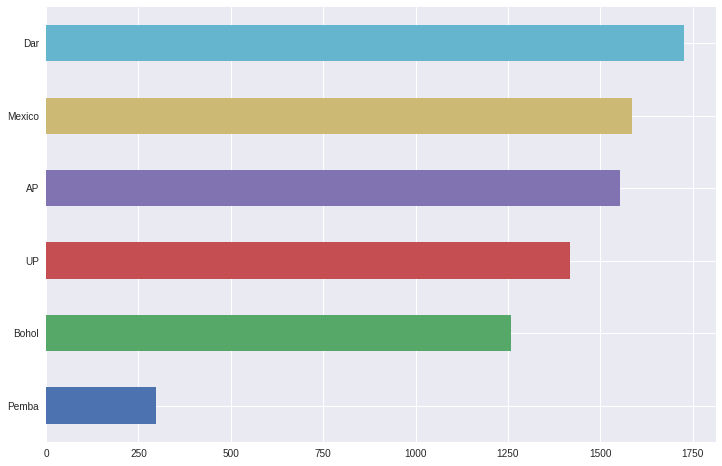

In [89]:
# create visual summaries
dfa.site.value_counts(ascending=True).plot(kind='barh', figsize=(12,8))

# `pandas.DataFrame.GroupBy`

In [90]:
df.groupby('gs_text34')

In [35]:
df.word_activ

person 1       0
person 2       0
person 3       0
person 4       0
person 5       0
person 6       0
person 7       0
person 8       0
person 9       0
person 10      0
person 11      0
person 12      0
person 13      0
person 14      0
person 15      0
person 16      0
person 17      0
person 18      0
person 19      0
person 20      0
person 21      0
person 22      0
person 23      0
person 24      0
person 25      0
person 26      0
person 27      0
person 28      0
person 29      0
person 30      0
person 31      0
person 32      0
person 33      0
person 34      0
person 35      0
person 36      0
person 37      0
person 38      0
person 39      0
person 40      0
person 41      0
person 42      0
person 43      0
person 44      0
person 45      0
person 46      0
person 47      0
person 48      0
person 49      0
person 50      0
              ..
person 7792    0
person 7793    0
person 7794    0
person 7795    0
person 7796    0
person 7797    0
person 7798    0
person 7799   

In [36]:
df.groupby('gs_text34').word_fever.mean()

gs_text34
AIDS                               0.284861
Acute Myocardial Infarction        0.135000
Asthma                             0.319149
Bite of Venomous Animal            0.015152
Breast Cancer                      0.035897
COPD                               0.122807
Cervical Cancer                    0.012903
Cirrhosis                          0.156550
Colorectal Cancer                  0.060606
Diabetes                           0.185990
Diarrhea/Dysentery                 0.293860
Drowning                           0.000000
Epilepsy                           0.208333
Esophageal Cancer                  0.025000
Falls                              0.109827
Fires                              0.024590
Homicide                           0.047904
Leukemia/Lymphomas                 0.153846
Lung Cancer                        0.075472
Malaria                            0.810000
Maternal                           0.119658
Other Cardiovascular Diseases      0.151442
Other Infectious Disea

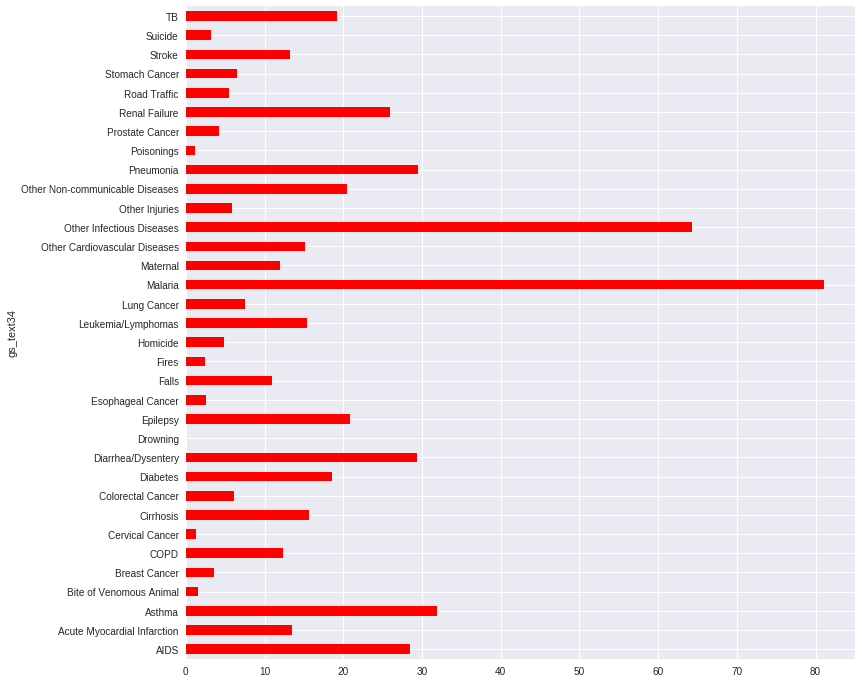

In [38]:
(dfa.groupby('gs_text34').word_fever.mean() * 100).plot(kind='barh', figsize=(12,12), color='red')

# reshaping tables

In [40]:
df.filter(like='word').head()

,word_abdomen,word_abl,word_accid,word_accord,word_ach,word_acidosi,word_acquir,word_activ,word_acut,word_add,...,word_wit,word_woman,word_womb,word_worri,word_wors,word_worsen,word_worst,word_wound,word_xray,word_yellow
person 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
person 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
person 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
person 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
person 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# get a smaller table to experiment with
t = df.filter(like='word').describe()
t

,word_abdomen,word_abl,word_accid,word_accord,word_ach,word_acidosi,word_acquir,word_activ,word_acut,word_add,...,word_wit,word_woman,word_womb,word_worri,word_wors,word_worsen,word_worst,word_wound,word_xray,word_yellow
count,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,...,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000
mean,0.056243,0.054712,0.038898,0.038388,0.016069,0.004591,0.016324,0.006887,0.040811,0.023084,...,0.007397,0.010713,0.008162,0.007907,0.009438,0.012753,0.015814,0.045402,0.014539,0.022574
std,0.314650,0.276994,0.231768,0.214715,0.139229,0.067607,0.129712,0.087210,0.219270,0.151868,...,0.091453,0.108973,0.101944,0.095505,0.098004,0.118840,0.142875,0.309673,0.139397,0.168655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,5.000000,4.000000,3.000000,4.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,7.000000,3.000000,3.000000


In [42]:
# transpose table
t.T.head()

,count,mean,std,min,25%,50%,75%,max
word_abdomen,7841.0,0.056243,0.314650,0.0,0.0,0.0,0.0,7.0
word_abl,7841.0,0.054712,0.276994,0.0,0.0,0.0,0.0,5.0
word_accid,7841.0,0.038898,0.231768,0.0,0.0,0.0,0.0,4.0
word_accord,7841.0,0.038388,0.214715,0.0,0.0,0.0,0.0,3.0
word_ach,7841.0,0.016069,0.139229,0.0,0.0,0.0,0.0,4.0


# appending `DataFrames`

In [43]:
# put together first three and last three rows of df
df.iloc[:3].append(df.iloc[-3:])

,site,module,gs_code34,gs_text34,va34,gs_code46,gs_text46,va46,gs_code55,gs_text55,...,word_woman,word_womb,word_worri,word_wors,word_worsen,word_worst,word_wound,word_xray,word_yellow,newid
person 1,Mexico,Adult,K71,Cirrhosis,6,K71,Cirrhosis,8,K71,Cirrhosis,...,0,0,0,0,0,0,0,0,0,1
person 2,AP,Adult,G40,Epilepsy,12,G40,Epilepsy,16,G40,Epilepsy,...,0,0,0,0,0,0,0,0,0,2
person 3,AP,Adult,J12,Pneumonia,26,J12,Pneumonia,37,J12,Pneumonia,...,0,0,0,0,0,0,0,0,0,3
person 7839,AP,Adult,T36,Poisonings,27,T36,Poisonings,38,T36,Poisonings,...,0,0,0,0,0,0,0,0,0,7844
person 7840,UP,Adult,X09,Fires,15,X09,Fires,19,X09,Fires,...,0,0,0,0,0,0,0,0,0,7845
person 7841,Dar,Adult,C15,Esophageal Cancer,13,C15,Esophageal Cancer,17,C15,Esophageal Cancer,...,0,0,0,0,0,0,0,0,0,7846


# merging `DataFrames`

In [44]:
df.iloc[:5,20:25]

,g1_06y,g1_07a,g1_07b,g1_07c,g1_08
person 1,2009.0,51,NaN,NaN,Married
person 2,2008.0,26,NaN,NaN,Unknown
person 3,2008.0,60,NaN,NaN,Unknown
person 4,2009.0,80,NaN,NaN,Widowed
person 5,2009.0,76,NaN,NaN,Married


In [45]:
cb.iloc[10:15]

,variable,question,module,health_care_experience,coding
10,g1_06d,Date of death [day],General,0,"99 ""Don't Know"""
11,g1_06m,Date of death [month],General,0,"1 ""January"" 2 ""February"" 3 ""March"" 4 ""April"" 5..."
12,g1_06y,Date of death [year],General,0,"9999 ""Don't Know"""
13,g1_07a,Last known age of the deceased [years],General,0,"999 ""Don't Know"""
14,g1_07b,Last known age of the deceased [months],General,0,"99 ""Don't Know"""


# merge question text into `df`

In [46]:
merged_df = pd.merge(df.T, cb, left_index=True, right_on='variable')
merged_df.filter(['variable', 'question', 'person 1', 'person 2']).dropna().head(10)

,variable,question,person 1,person 2
0,site,Site,Mexico,AP
5,gs_level,Gold Standard Diagnosis Level,GS Level 2,GS Level 1
9,g1_05,Sex of deceased,Male,Male
10,g1_06d,Date of death [day],27,19
11,g1_06m,Date of death [month],September,November
12,g1_06y,Date of death [year],2009,2008
13,g1_07a,Last known age of the deceased [years],51,26
16,g1_08,Marital status of deceased,Married,Unknown
19,g2_01,Language of interview,Spanish,Hindi
20,g2_02,Interviewer ID number,6,2


# GroupBy

In [47]:
df.groupby('gs_text34').word_fever.mean()

gs_text34
AIDS                               0.284861
Acute Myocardial Infarction        0.135000
Asthma                             0.319149
Bite of Venomous Animal            0.015152
Breast Cancer                      0.035897
COPD                               0.122807
Cervical Cancer                    0.012903
Cirrhosis                          0.156550
Colorectal Cancer                  0.060606
Diabetes                           0.185990
Diarrhea/Dysentery                 0.293860
Drowning                           0.000000
Epilepsy                           0.208333
Esophageal Cancer                  0.025000
Falls                              0.109827
Fires                              0.024590
Homicide                           0.047904
Leukemia/Lymphomas                 0.153846
Lung Cancer                        0.075472
Malaria                            0.810000
Maternal                           0.119658
Other Cardiovascular Diseases      0.151442
Other Infectious Disea

In [48]:
for g, dfg in df.groupby('gs_text34'):
    print(g)
    # process DataFrame for this group
    break

AIDS


In [49]:
# apply

def my_func(row):
    return row['word_xray'] > 0

my_func(df.iloc[0])

df.apply(my_func, axis=1)

person 1       False
person 2       False
person 3       False
person 4       False
person 5       False
person 6       False
person 7       False
person 8       False
person 9       False
person 10      False
person 11      False
person 12      False
person 13      False
person 14      False
person 15      False
person 16      False
person 17       True
person 18      False
person 19      False
person 20      False
person 21      False
person 22      False
person 23      False
person 24      False
person 25      False
person 26      False
person 27      False
person 28      False
person 29      False
person 30      False
person 31      False
person 32      False
person 33      False
person 34      False
person 35      False
person 36      False
person 37      False
person 38      False
person 39      False
person 40      False
person 41      False
person 42      False
person 43      False
person 44      False
person 45      False
person 46      False
person 47      False
person 48    

# [Time-series](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)


In [0]:
rng = pd.date_range('1/1/2012', periods=1000, freq='S')

In [51]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               ...
               '2012-01-01 00:16:30', '2012-01-01 00:16:31',
               '2012-01-01 00:16:32', '2012-01-01 00:16:33',
               '2012-01-01 00:16:34', '2012-01-01 00:16:35',
               '2012-01-01 00:16:36', '2012-01-01 00:16:37',
               '2012-01-01 00:16:38', '2012-01-01 00:16:39'],
              dtype='datetime64[ns]', length=1000, freq='S')

In [52]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    132
2012-01-01 00:00:01    237
2012-01-01 00:00:02    157
2012-01-01 00:00:03    479
2012-01-01 00:00:04    468
2012-01-01 00:00:05    196
2012-01-01 00:00:06    145
2012-01-01 00:00:07    414
2012-01-01 00:00:08     80
2012-01-01 00:00:09     74
2012-01-01 00:00:10    149
2012-01-01 00:00:11     79
2012-01-01 00:00:12     78
2012-01-01 00:00:13    371
2012-01-01 00:00:14    307
2012-01-01 00:00:15    164
2012-01-01 00:00:16    117
2012-01-01 00:00:17     55
2012-01-01 00:00:18    319
2012-01-01 00:00:19     66
2012-01-01 00:00:20     94
2012-01-01 00:00:21    439
2012-01-01 00:00:22    111
2012-01-01 00:00:23    104
2012-01-01 00:00:24     18
2012-01-01 00:00:25    452
2012-01-01 00:00:26    258
2012-01-01 00:00:27     13
2012-01-01 00:00:28    197
2012-01-01 00:00:29    194
2012-01-01 00:00:30    142
2012-01-01 00:00:31    428
2012-01-01 00:00:32    176
2012-01-01 00:00:33    190
2012-01-01 00:00:34    486
2012-01-01 00:00:35    413
2012-01-01 00:00:36    153
2

In [53]:
ts.resample('5Min').sum()

2012-01-01 00:00:00    76447
2012-01-01 00:05:00    69541
2012-01-01 00:10:00    77326
2012-01-01 00:15:00    25215
Freq: 5T, dtype: int64

# Exercise


# Use the codebook to find the column which corresponds to the question "Did ____ have a fever?" 

In [57]:
# in here:
cb.head()

,variable,question,module,health_care_experience,coding
0,site,Site,General,0,NaN
1,newid,Study ID,General,0,NaN
2,gs_diagnosis,Gold Standard Diagnosis Code,General,0,NaN
3,gs_comorbid1,Gold Standard Comorbid Conditions 1,General,0,NaN
4,gs_comorbid2,Gold Standard Comorbid Conditions 2,General,0,NaN


In [58]:
# hint: look here
cb.question.str

79                               Did [name] have a fever?
80      How many days did the fever last? [specify units]
81                      How many days did the fever last?
82                              How severe was the fever?
83                         What was the pattern of fever?
84               Did [name] have sweating with the fever?
437     The open narratives contained the word or stem...
1078    During the illness that led to death, did the ...
1079     At what age did the fever start? [specify units]
1080                     At what age did the fever start?
1081    How many days did the fever last? [specify units]
1082                    How many days did the fever last?
1107    During the illness that led to death, did [nam...
1108    How many days did the fever last? [specify units]
1109                    How many days did the fever last?
1110                  Did the fever continue until death?
1111                            How severe was the fever?
1112          

In [0]:
var = 


The "endorsement rate" for a sign or symptom of disease is the fraction of verbal autopsy interviews where the respondent answered "Yes" to the question about that sign/symptom.

# Find the cause with the highest endorsement rate for the symptom "fever" among Adult deaths

In [0]:
# create a new column with 0/1 values instead of Yes/No/Don't Know/Refused to Answer
df['fever'] = df[var] == 'Yes'

In [0]:
# use groupby like we did in class

# Display the cause-specific endorsement rates visually

Text(0.5,0,u'Endorsement Rate (%)')

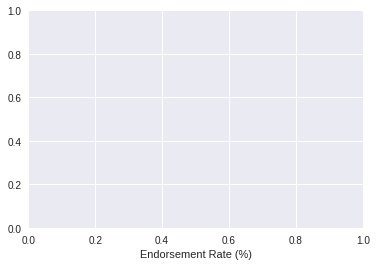

In [60]:
import matplotlib.pyplot as plt
# do some plotting like we did in class
plt.xlabel('Endorsement Rate (%)')

# Find the question that asks if the deceased had AIDS

In [0]:
# this might be familiar now...

# Make a 2x2 table showing the number of adult deceased with and without this question endorsed for decedents with underlying cause AIDS and not AIDS

In [0]:
# could be good to start by making some numeric columns like above

In [0]:
# groupby is a way to go, but not the only way

# Compare this 2x2 table across study sites

In [0]:
# note: there are lots of ways to do this
# try to find one that is so simple, you will understand it next time you look

# Now do a series of 2x2 tables comparing the percent of deaths truely due to AIDS for which "Had AIDS" question was endorsed

In [0]:
# some interesting differences. if you want to know why, you might be a social scientist...